In [ ]:
# Importing Libararies

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Fetching stoch data using yahoo finance

import yfinance as yf
df = yf.download("AAPL", start="2019-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Optional if you want to see graph of stock price
'''
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()
'''

"\nplt.figure(figsize=(16,8))\nplt.title('Close Price History')\nplt.plot(df['Close'])\nplt.xlabel('Date', fontsize=18)\nplt.ylabel('Close Price USD ($)', fontsize=18)\nplt.show()\n"

In [ ]:
# we only care about closing price
data = df.filter(["Close"])

In [ ]:
#Get all data in one array
dataSet = data.values

In [ ]:
# identify index on which we want to train our model
training_data_len = math.ceil(len(dataSet) * 0.8)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
# Transforming data, good practice
scaled_data = scaler.fit_transform(dataSet)

In [ ]:
train_data = scaled_data[:training_data_len, :]

In [ ]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)

[array([0.02596523, 0.        , 0.01001963, 0.0094749 , 0.01412984,
       0.01835558, 0.01916443, 0.01667188, 0.01289183, 0.01795943,
       0.0210462 , 0.02256483, 0.02414949, 0.01833908, 0.0193625 ,
       0.01734866, 0.02570111, 0.02329113, 0.02061701, 0.03806474,
       0.04002905, 0.04016111, 0.04796883, 0.05280532, 0.05290438,
       0.04745712, 0.04658226, 0.04496458, 0.04737458, 0.04620259,
       0.04722603, 0.04659876, 0.0474406 , 0.04925636, 0.0476552 ,
       0.05080801, 0.05288786, 0.05305294, 0.05394429, 0.05110512,
       0.05410937, 0.05556198, 0.05503375, 0.05336657, 0.05003218,
       0.05070897, 0.06059654, 0.06391443, 0.06523498, 0.06856934,
       0.07251447, 0.07565078, 0.07319126, 0.07588188, 0.0873211 ,
       0.08065235, 0.07683928, 0.07362043, 0.07639359, 0.07680626])]
[0.07883659018389935]


In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# OUR MODEL

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
842/842 [==============================] - 34s 36ms/step - loss: 0.0047
Epoch 2/5
842/842 [==============================] - 23s 27ms/step - loss: 0.0021
Epoch 3/5
842/842 [==============================] - 27s 32ms/step - loss: 0.0016
Epoch 4/5
842/842 [==============================] - 26s 30ms/step - loss: 0.0011
Epoch 5/5
842/842 [==============================] - 23s 28ms/step - loss: 9.9427e-04


In [ ]:
#import joblib

#joblib.dump(scaler, 'scalerForStocks.pkl')

In [ ]:
test_data = scaled_data[training_data_len - 60:]
# create data sets x_test and y_test
x_test = []
y_test = dataSet[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 14ms/step


In [ ]:
# get root mean squared error
rmse = np.sqrt(np.mean(predictions-y_test) ** 2)
rmse

6.509143507215712

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-22-8f78faa8f9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


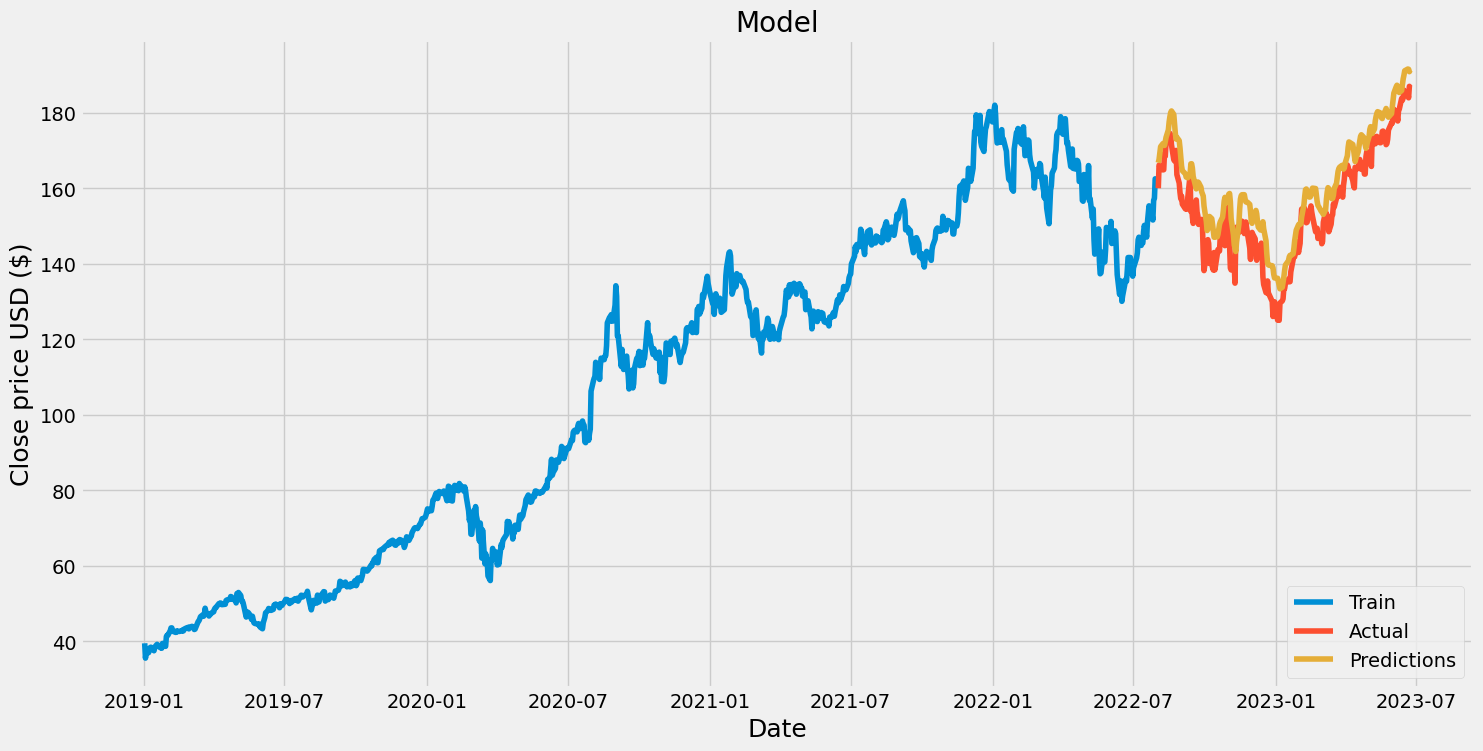

In [ ]:
# visualize

plt.figure(figsize=(16,8))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# show the actual price and predicted prices

valid

,Close,Predictions
Date,,
2022-08-02,160.009995,166.764282
2022-08-03,166.130005,167.640335
2022-08-04,165.809998,169.405914
2022-08-05,165.350006,171.033218
2022-08-08,164.869995,171.834457
...,...,...
2023-06-16,184.919998,191.129776
2023-06-20,185.009995,191.585190
2023-06-21,183.960007,191.531433


In [ ]:
stock_name = "AAPL"

stock_quote = yf.download(stock_name)

new_df = stock_quote.filter(['Close'])

last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(type(pred_price[0][0]))

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 55ms/step
<class 'numpy.float32'>


In [ ]:
stock_quote2 = yf.download(stock_name)
print(stock_quote2['Close'][-1])

[*********************100%***********************]  1 of 1 completed
186.67999267578125


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import joblib

stock_quote = yf.download("AAPL")
new_df = stock_quote.filter(['Close'])

forecast = []
period = 100
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

for i in range(period):
  current_pred = model.predict(X_test)
  print(scaler.inverse_transform(current_pred))
  forecast.append(current_pred)
  X_test = np.append(X_test[:,1:,:], [current_pred], axis=1)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

def return_predictions(model, scaler, stock_name):
  try:
    stock_quote = yf.download(stock_name)
    new_df = stock_quote.filter(['Close'])
    last_60_days = new_df[-60:].values
    last_60_days_scaled = scaler.transform(last_60_days)
    X_test = []
    X_test.append(last_60_days_scaled)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    pred_price = model.predict(X_test)
    pred_price = scaler.inverse_transform(pred_price)
    print(pred_price)
    return pred_price
  except:
    return -1

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 18ms/step
[[191.94325]]
1/1 [==============================] - 0s 19ms/step
[[194.35434]]
1/1 [==============================] - 0s 20ms/step
[[197.60683]]
1/1 [==============================] - 0s 26ms/step
[[201.1887]]
1/1 [==============================] - 0s 25ms/step
[[204.85825]]
1/1 [==============================] - 0s 26ms/step
[[208.47592]]
1/1 [==============================] - 0s 21ms/step
[[211.93669]]
1/1 [==============================] - 0s 24ms/step
[[215.15532]]
1/1 [==============================] - 0s 22ms/step
[[218.06807]]
1/1 [==============================] - 0s 19ms/step
[[220.63515]]
1/1 [==============================] - 0s 19ms/step
[[222.84218]]
1/1 [==============================] - 0s 23ms/step
[[224.69836]]
1/1 [==============================] - 0s 41ms/step
[[226.23323]]
1/1 [==============================] - 0s 80ms/step
[[227.49173]]
1/1 [===